### Import Libraries

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from IPython.display import Image

from zipfile import ZipFile
from urllib.request import urlretrieve

### Download Assets

In [20]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [21]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

### Display Image Directly

In [22]:
# Display 18x18 pixel image
Image(filename='checkerboard_18x18.png')

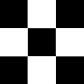

In [23]:
Image(filename='checkerboard_84x84.png')

In [24]:
# Read image as grayscale
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Print the image data (pixel values), elements of a 2D numpy array.
# Each pixel value is 8-bits [0, 255]
# 0 -> black, 255 -> white
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### Display Image Attributes

In [25]:
# Print the size of an image
print("Image size is ", cb_img.shape)

# Print data type of image
print("Data type of image is ", cb_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


### Display Images Using Matplotlib

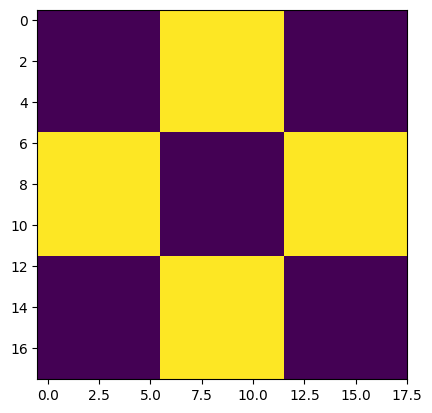

In [26]:
# Display image
plt.imshow(cb_img)

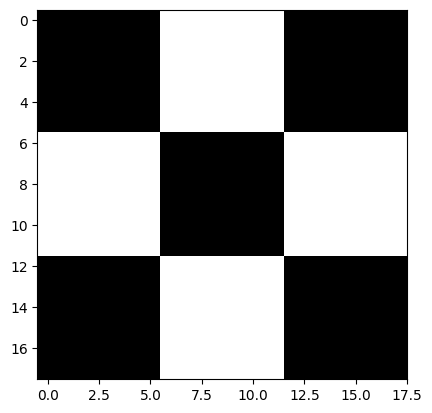

In [27]:
# Set up grayscale colour map
plt.imshow(cb_img, cmap='gray')

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

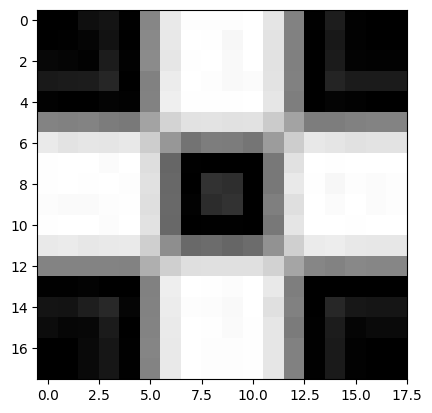

In [29]:
# Read image as grayscale
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", 0)

# Print image
print(cb_img_fuzzy)

# Display image
plt.imshow(cb_img_fuzzy, cmap='gray')

### Working with Colour Images

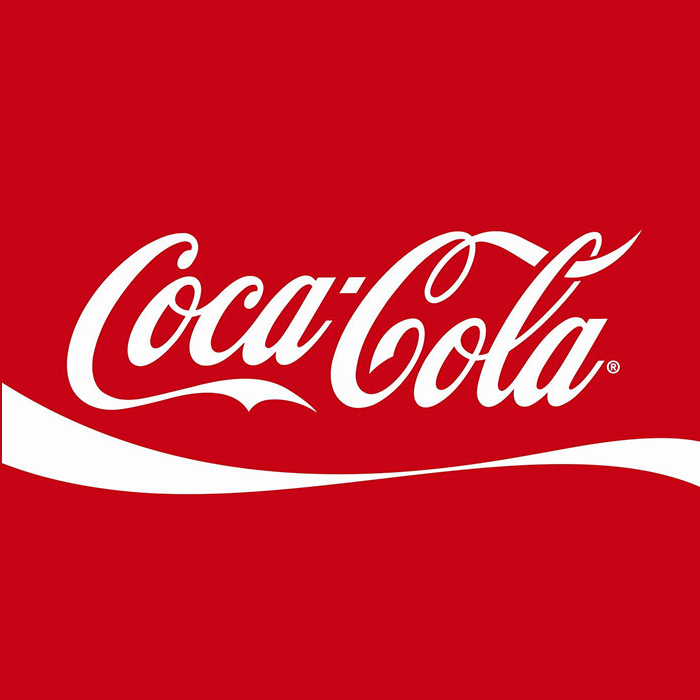

In [31]:
# Read and display Coca-Cola Image
Image("coca-cola-logo.png")

In [32]:
coke_img = cv2.imread("coca-cola-logo.png", 1)
print("Image size is ", coke_img.shape)
print("Data type of image is ", coke_img.dtype)
print("")

Image size is  (700, 700, 3)
Data type of image is  uint8



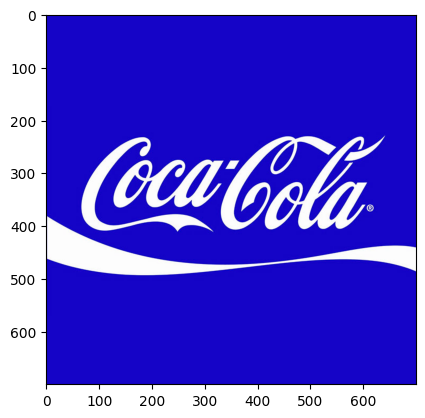

In [33]:
plt.imshow(coke_img)

In [34]:
# What happened?
# Matplotlib expects the image in RGB format, but opencv stores images in BGR format.
# For correct display, we need to reverse the channels of the image.

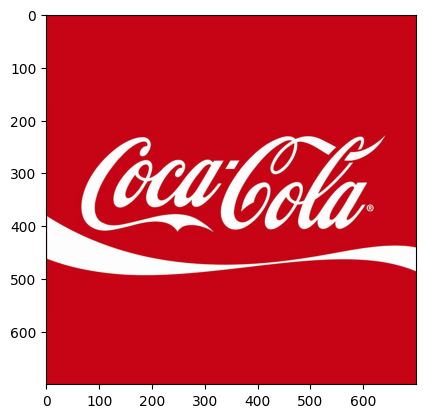

In [35]:
coke_img_channels_reversed = coke_img[:, :, :: -1]
plt.imshow(coke_img_channels_reversed)

### Splitting and Merging Colour Channels

Text(0.5, 1.0, 'Merged output')

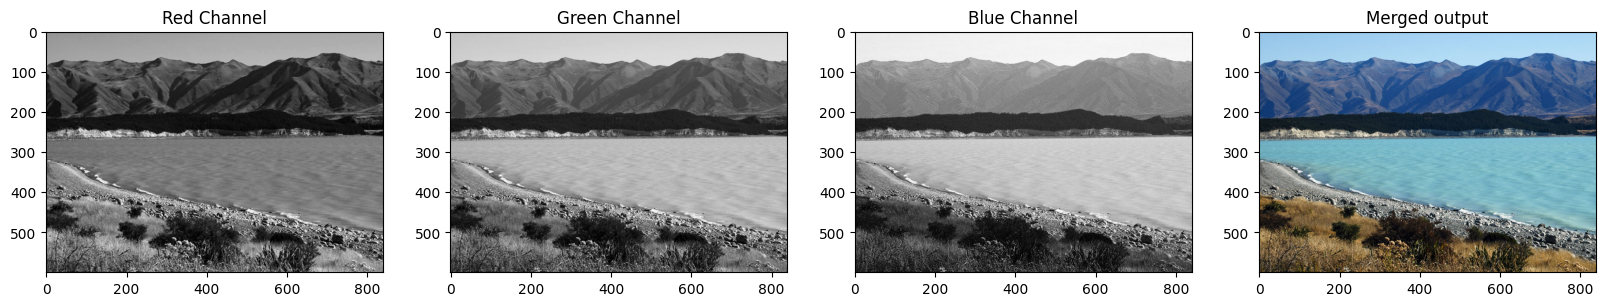

In [39]:
# Split the image into B, G, R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(r, cmap='gray');plt.title('Red Channel')
plt.subplot(142);plt.imshow(g, cmap='gray');plt.title('Green Channel')
plt.subplot(143);plt.imshow(b, cmap='gray');plt.title('Blue Channel')

# Merge individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show merged output
plt.subplot(144);plt.imshow(imgMerged[:, :, ::-1]);plt.title('Merged output')

### Changing from BGR to RGB

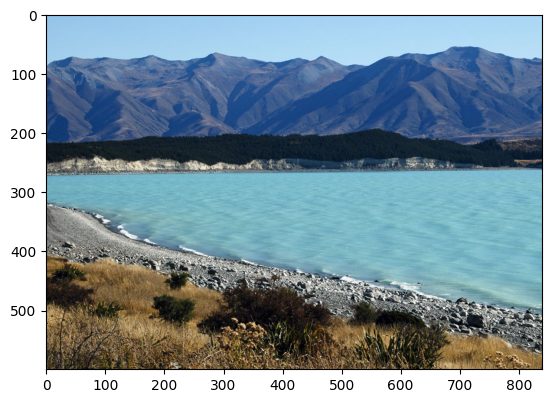

In [40]:
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV colourspace

Text(0.5, 1.0, 'Original')

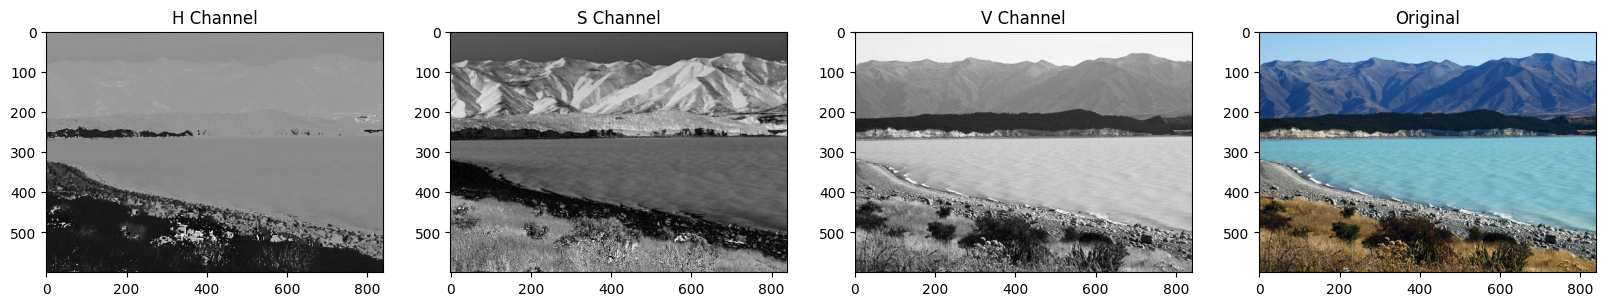

In [43]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)
# Split into HSV components (Hue, Saturation, Value)
h, s, v = cv2.split(img_hsv)

# Plot individual channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap='gray');plt.title('H Channel')
plt.subplot(142);plt.imshow(s, cmap='gray');plt.title('S Channel')
plt.subplot(143);plt.imshow(v, cmap='gray');plt.title('V Channel')
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title('Original')


### Modifying Individual Channel

Text(0.5, 1.0, 'Modified Image')

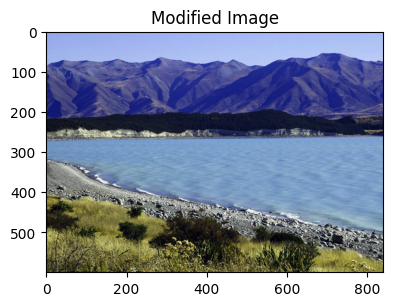

In [44]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the new modified image
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(img_NZ_rgb);plt.title('Modified Image')

### Saving Images

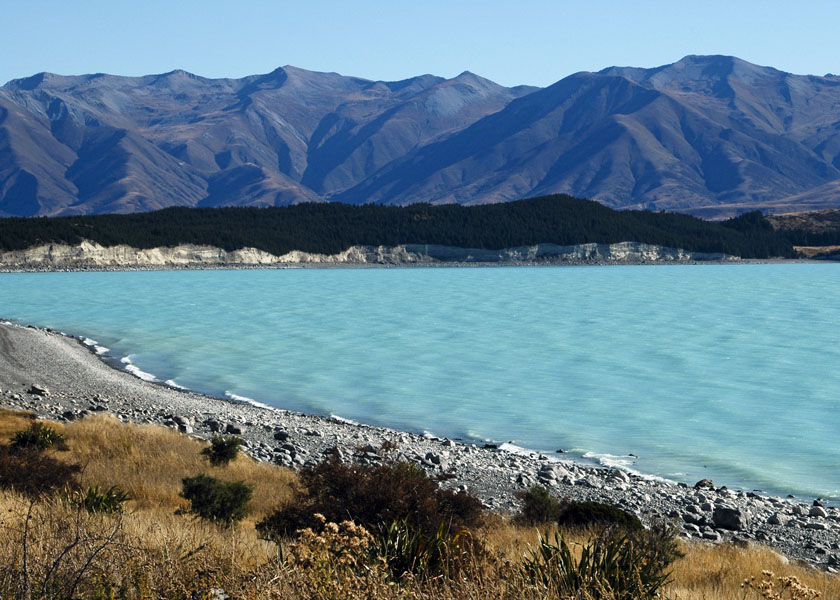

In [45]:
cv2.imwrite("New_Zealand_SAVED.png", img_NZ_bgr)
Image(filename="New_Zealand_SAVED.png")

In [46]:
# Read image as colour
img_NZ_bgr = cv2.imread("New_Zealand_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape is: ", img_NZ_bgr.shape)

# Read image as grayscale
img_NZ_gry = cv2.imread("New_Zealand_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape is: ", img_NZ_gry.shape)

img_NZ_bgr shape is:  (600, 840, 3)
img_NZ_gry shape is:  (600, 840)
